<a href="https://colab.research.google.com/github/wissal9999999999999/Retrieval_of_olive_tree_biophysical_properties_from_Sentinel-2_time_series/blob/main/Copie_de_Inversion_par_ANN_conception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importer les bibliothèques
import tensorflow as tf;
import keras
import numpy as np
import pandas
import keras
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from sklearn.model_selection import KFold #KFold cross-validation
from sklearn.preprocessing import MinMaxScaler #ki tabda distribution de données mahoumech normal w b3ad barcha ala badhhom les valeurs
from sklearn.preprocessing import StandardScaler#base de donnée symetrique normal
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
from google.colab import files
data_to_load = files.upload()


In [ ]:
print(data_to_load.keys())


dict_keys(['Lut_4.csv'])


In [ ]:
import pandas as pd
import io

# Use the correct key
dataset = pd.read_csv(io.BytesIO(data_to_load['Sans titre.csv']), encoding='latin-1')
print(dataset.shape)


In [ ]:
# X=inputs & Y=outputs
X = dataset.iloc[:, :10]
Y = dataset.iloc[:, 10:]

In [ ]:
print("Input Features (X):")
print(X.shape)
print("\nOutput Labels (Y):")
print(Y.shape)

Input Features (X):
(1151, 10)

Output Labels (Y):
(1151, 10)


In [ ]:
## Division des données en ensembles d'entraînement et de test
X_train, X_test,  Y_train, Y_test,  = train_test_split(X, Y, test_size=0.3 ) #70 30

In [ ]:
# Assuming X_train, X_test, Y_train, Y_test have been defined
print("Shape of Training Data (X_train, Y_train):", X_train.shape, Y_train.shape)
print("Shape of Testing Data (X_test, Y_test):", X_test.shape, Y_test.shape)


Shape of Training Data (X_train, Y_train): (805, 10) (805, 10)
Shape of Testing Data (X_test, Y_test): (346, 10) (346, 10)


MinMaxScaler :

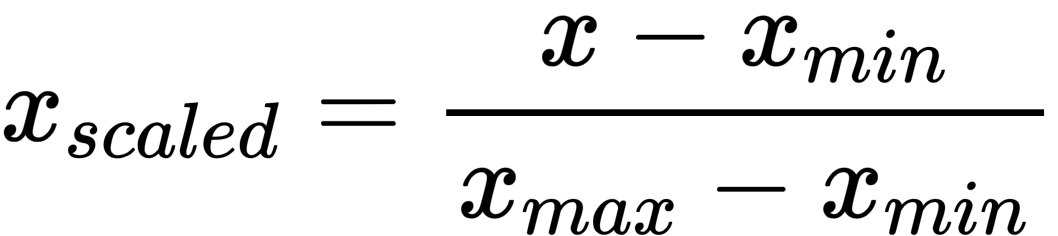

StandardScaler




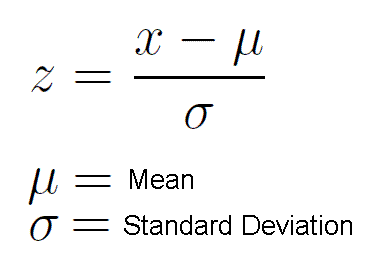

---



In [ ]:
## Normalisation des données

# Nous utilisons StandardScaler() pour normaliser les caractéristiques d'entrée (X).
# Cela standardise les valeurs en soustrayant la moyenne et en divisant par l'écart type,
# garantissant que les caractéristiques ont une moyenne nulle et une variance unitaire.

scale_x = StandardScaler()

# Nous utilisons MinMaxScaler() pour normaliser les caractéristiques de sortie (Y).
# MinMaxScaler met à l'échelle les valeurs entre 0 et 1, préservant ainsi les relations
# proportionnelles entre les valeurs et garantissant une plage fixe pour les prédictions.
scale_Y = MinMaxScaler()

# Nous ajustons les scalers aux données d'entraînement respectives.
scale_x.fit(X)
scale_Y.fit(Y)

MinMaxScaler()

In [ ]:
## Sauvegarde des scalers
joblib.dump(scale_x, "scaler_x.save")
joblib.dump(scale_Y, "scaler_Y.save")

# Définition du modèle
#--Train Data--#
X_train_s = scale_x.transform(X_train)
Y_train_s = scale_Y.transform(Y_train)

#--Test Data--#
X_test_s = scale_x.transform(X_test)
Y_test_s = scale_Y.transform(Y_test)

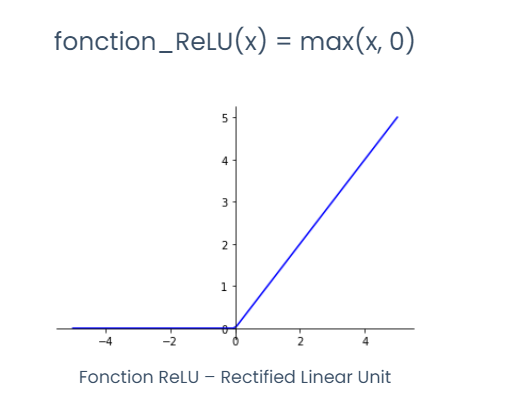


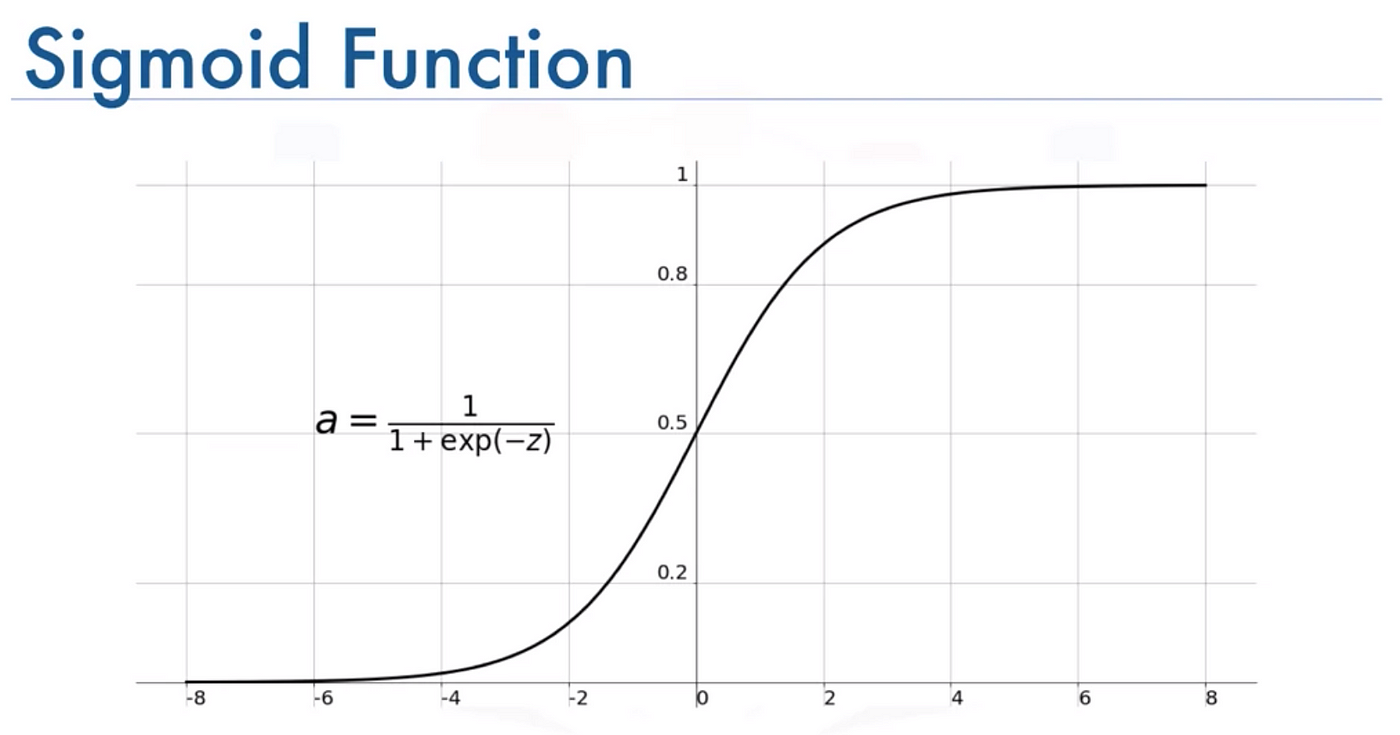

In [ ]:
# Importer les modules nécessaires pour définir le modèle
from keras.models import Model
from keras import layers

# Définir la forme des données d'entrée (input_dim)
input_dim = X_train.shape[1]

# Créer la couche d'entrée du modèle avec le nombre de caractéristiques en input_dim
Linput = layers.Input(shape=(input_dim,), name='Linput')

# Nombre de neurones pour la couche L2, ajustable selon votre choix
L2_neurons = 64
# Ajouter la couche Dense (entièrement connectée) L2 avec activation ReLU
L2 = layers.Dense(L2_neurons, activation='relu', name='L2')(Linput)

# Ajouter une couche de régularisation Dropout pour éviter le surajustement
L2 = layers.Dropout(0.2)(L2) #pour éviter le surajustement.

# Nombre de neurones pour la couche Lend, ajustable selon votre choix
Lend_neurons = 32

# Ajouter la couche Dense Lend avec activation ReLU
Lend = layers.Dense(Lend_neurons, activation='relu', name='Lend')(L2)

# Dimension des étiquettes de sortie (nombre de neurones de sortie)
output_dim = Y_train.shape[1]

# Ajouter la couche Dense de sortie Loutput avec activation sigmoïde pour la classification binaire
Loutput = layers.Dense(output_dim, activation='sigmoid', name='Loutput')(Lend)

# Créer le modèle global en spécifiant les couches d'entrée et de sortie
Mymodel = Model(inputs=[Linput], outputs=[Loutput])


In [ ]:
#sauvegarder le modèle pendant l'entraînement
from keras.callbacks import ModelCheckpoint

# Utiliser save_freq au lieu de period #save_freq='epoch', cela signifie que le modèle sera sauvegardé à la fin de chaque époque d'entraînemen
# Créer un point de contrôle pour sauvegarder le meilleur modèle pendant l'entraînement
# monitor='loss' : surveiller la perte d'entraînement
# verbose=1 : afficher des messages pendant l'entraînement
# save_best_only=True : sauvegarder uniquement le meilleur modèle basé sur le critère de surveillance
# mode='auto' : déterminer automatiquement le critère pour lequel le modèle est considéré comme le meilleur
# save_freq='epoch' : sauvegarder le modèle à la fin de chaque époque
checkpoint = ModelCheckpoint("bestModel.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')
callbacks_list = [checkpoint]



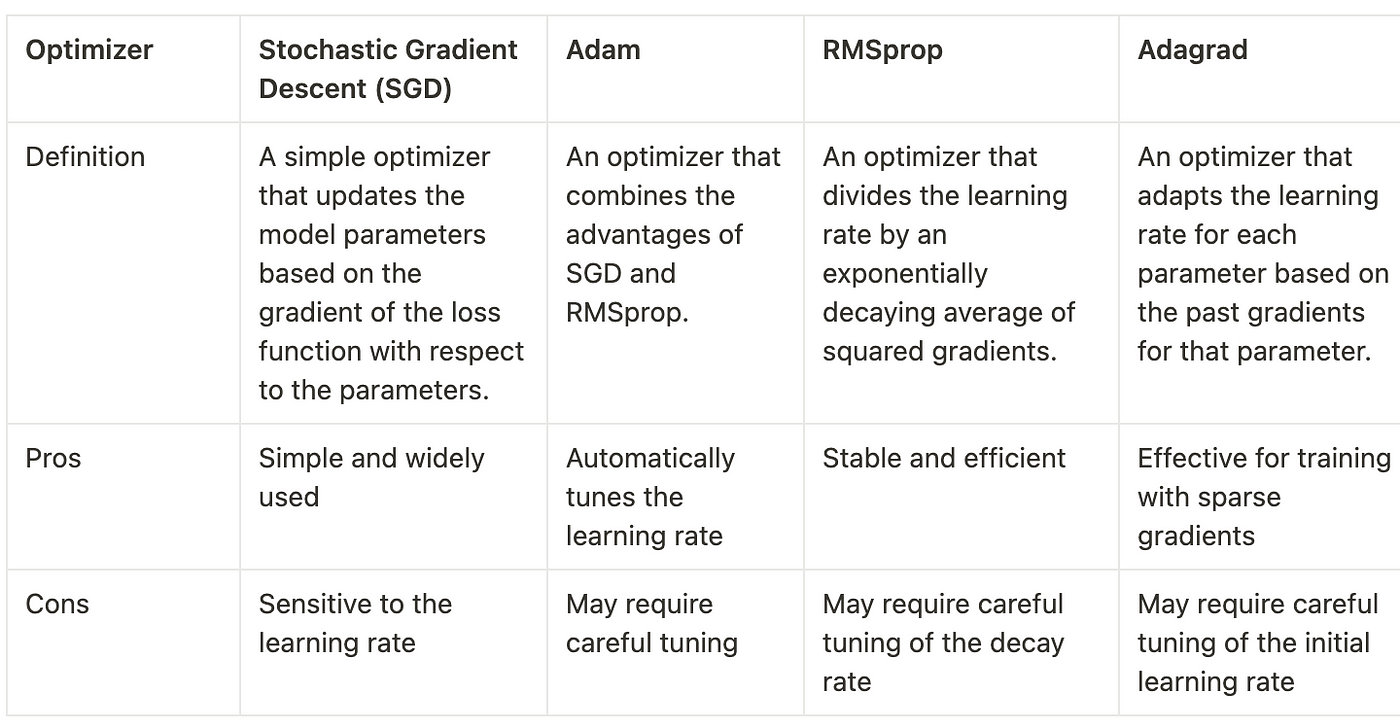

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)


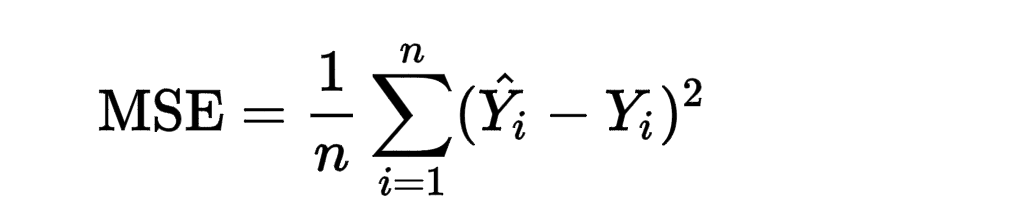

In [ ]:
#Compilation du modèle ( minimiser la fonction de perte (mean squared error) à l'aide de l'optimiseur Adam)
Mymodel.compile(optimizer=opt, loss='mean_squared_error')

In [ ]:
# Entraînement du modèle
history=Mymodel.fit(x=X_train_s ,y=Y_train_s , epochs=10 , batch_size=32, validation_data=[X_test_s,Y_test_s],callbacks=callbacks_list)


Epoch 1/10
23/26 [=========================>....] - ETA: 0s - loss: 0.1491
Epoch 1: loss improved from inf to 0.14698, saving model to bestModel.hdf5
26/26 [==============================] - 9s 18ms/step - loss: 0.1470 - val_loss: 0.1208
Epoch 2/10
14/26 [===============>..............] - ETA: 0s - loss: 0.1126

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: loss improved from 0.14698 to 0.10420, saving model to bestModel.hdf5
26/26 [==============================] - 0s 9ms/step - loss: 0.1042 - val_loss: 0.0832
Epoch 3/10
14/26 [===============>..............] - ETA: 0s - loss: 0.0779
Epoch 3: loss improved from 0.10420 to 0.07328, saving model to bestModel.hdf5
26/26 [==============================] - 0s 9ms/step - loss: 0.0733 - val_loss: 0.0583
Epoch 4/10
25/26 [===========================>..] - ETA: 0s - loss: 0.0553
Epoch 4: loss improved from 0.07328 to 0.05526, saving model to bestModel.hdf5
26/26 [==============================] - 0s 8ms/step - loss: 0.0553 - val_loss: 0.0478
Epoch 5/10
14/26 [===============>..............] - ETA: 0s - loss: 0.0495
Epoch 5: loss improved from 0.05526 to 0.04810, saving model to bestModel.hdf5
26/26 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.0436
Epoch 6/10
24/26 [==========================>...] - ETA: 0s - loss: 0.0440
Epoch 6: loss improved from 0.04810

dict_keys(['loss', 'val_loss'])


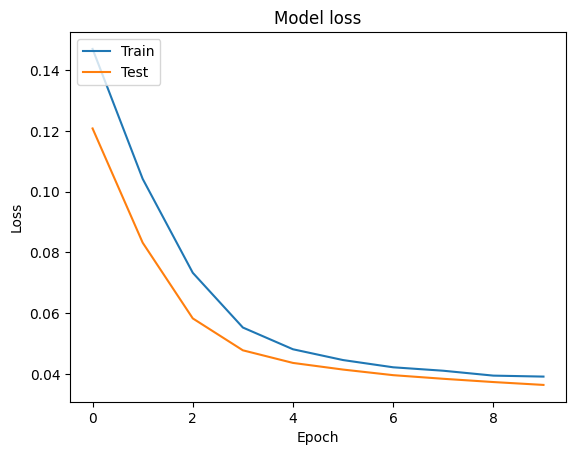

In [ ]:
# Tracer la courbe de perte d'entraînement et de test au fil des époques


import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#test taht train taalem bel behy

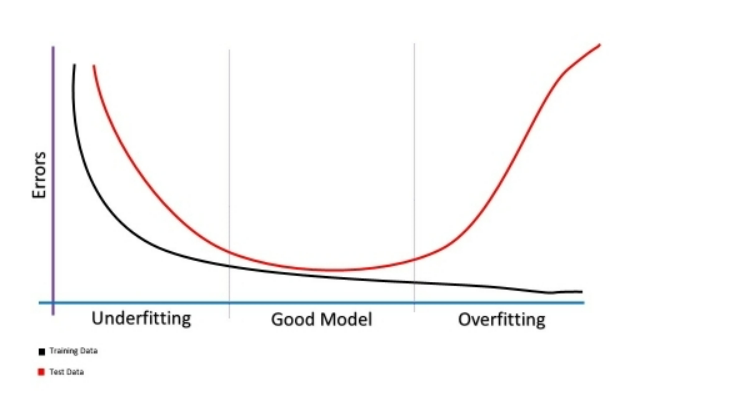

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Prédictions sur les données de test
predictions = Mymodel.predict(X_test_s)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(Y_test_s, predictions)
print(f'Coefficient de détermination (R²) : {r2}')

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test_s, predictions))
print(f'Erreur quadratique moyenne (RMSE) : {rmse}')


11/11 [==============================] - 1s 9ms/step
Coefficient de détermination (R²) : 0.5748710909343173
Erreur quadratique moyenne (RMSE) : 0.19068136589386694


R² de 0.57 : Le modèle explique plus de la moitié de la variabilité des données, une performance raisonnable mais avec de la place pour l'amélioration.

RMSE de 0.19 : Les prédictions ont une erreur moyenne d'environ 0.19 unité par rapport aux valeurs réelles. Une performance décente, mais l'exactitude dépend de l'échelle des données.

**Sauvegarde de l'architecture du modèle en format JSON :
**



In [ ]:
# Sauvegarde de l'architecture du modèle en format JSON

model_json = Mymodel.to_json() #convertit l'architecture du modèle (Mymodel) en format JSON.
with open("architecture_model.json", "w") as json_file:
   json_file.write(model_json) # Écrit le contenu JSON de l'architecture du modèle dans le fichier JSON.
# Sauvegarde des poids du modèle
Mymodel.save_weights("saved_model.h5") #Cette ligne sauvegarde les poids du modèle dans un fichier HDF5 appelé "saved_model.h5"
print("Saved model to disk")

Saved model to disk


In [ ]:
from google.colab import files

# Télécharger le fichier JSON
files.download('architecture_model.json')

# Télécharger le fichier de poids
files.download('saved_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



```
# Ce texte est au format code
```

# *Partie décodage*

In [ ]:

from keras.models import model_from_json

# Charger l'architecture du modèle depuis le fichier JSON
json_file = open('architecture_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# Charger les poids du modèle depuis le fichier HDF5
loaded_model.load_weights("saved_model.h5")
print("Loaded model from disk")

#Afficher un résumé du modèle chargé :

loaded_model.summary()


Loaded model from disk
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Linput (InputLayer)         [(None, 10)]              0         
                                                                 
 L2 (Dense)                  (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Lend (Dense)                (None, 32)                2080      
                                                                 
 Loutput (Dense)             (None, 10)                330       
                                                                 
Total params: 3114 (12.16 KB)
Trainable params: 3114 (12.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ref_SENTINEL2A_20210403-102038.csv to ref_SENTINEL2A_20210403-102038.csv


In [ ]:
import numpy as np

# Charger les scalers
scale_x = joblib.load("scaler_x.save")
scale_y = joblib.load("scaler_Y.save")

image_data = pd.read_csv('ref_SENTINEL2A_20210403-102038.csv')

# Assurez-vous que le nombre de colonnes correspond à votre configuration
X_image = image_data.iloc[:, :10]

# Ajuster les noms de colonnes pour correspondre à ceux attendus par le scaler_x
X_image.columns = scale_x.get_feature_names_out()

X_image_s = scale_x.transform(X_image)

# Effectuer la prédiction sur les données normalisées
Y_image_pred_s = loaded_model.predict(X_image_s)

# Inverser la normalisation pour obtenir les prédictions dans l'échelle d'origine
Y_image_pred = scale_y.inverse_transform(Y_image_pred_s)

# Afficher les prédictions
print(Y_image_pred)

# Enregistrer les prédictions dans un fichier CSV
np.savetxt("predictions_ref_SENTINEL2A.csv", Y_image_pred, fmt='%10.5f', delimiter=',')


56/56 [==============================] - 0s 1ms/step
[[18.45571   75.0775     1.3608091 ...  1.8143646 24.61868    2.972227 ]
 [18.455856  75.14046    1.3611801 ...  1.8175235 24.534054   2.9828975]
 [18.455704  75.30573    1.3396755 ...  1.6828655 25.213303   2.3530214]
 ...
 [18.453573  75.70363    1.3684458 ...  1.9061434 24.759779   3.3821843]
 [18.453415  75.74251    1.3647722 ...  1.9000508 24.841366   3.3441195]
 [18.453325  75.59824    1.3691478 ...  1.9105382 24.828299   3.409224 ]]
